# Topic of Labs

This week's labs will involve some further explorations of topics we have begun in class. 

## Lab 1

 * Build a Python library our of Week 6 Lecture 2 material.  This is a Victoria Police Department crime stats library.  We start with the *vicpd.py* library, which is a collation of everything we did in Week 6, Lecture 2.  
 
 * Use **dir(vicpd)** to list the commands available in the vicpd library, or just load the file and look.
 
 * We continue exploring the VicPD and weather stats, looking to make inferences with the data. 
 

In [2]:
import vicpd as vpd

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain mm, snow cm) indexed on date
VicPD library loaded.


**Suggestions**

- Make a variety of plots, of one daily crime count vs another. 

- Look for linear relationships, or perhaps non-linear relationships using least-squares. 

- Look for phenomena you might expect, like high accident counts after freezing rain. 

- If you find such, perhaps plot them spatially.  Do they occur on hills? 

In [3]:
import pprint as pp
pp.pprint(vpd.all_tots)

defaultdict(<class 'int'>,
            {'Alarm': 904,
             'Arson': 182,
             'Assault': 2215,
             'Assault with Deadly Weapon': 1208,
             'Breaking & Entering': 3616,
             'Community Policing': 34,
             'Disorder': 2673,
             'Drugs': 2720,
             'Liquor': 7894,
             'Other': 16515,
             'Property Crime': 5785,
             'Robbery': 544,
             'Theft': 14685,
             'Theft from Vehicle': 6643,
             'Theft of Vehicle': 871,
             'Traffic': 15127,
             'Vehicle Stop': 4318,
             'Weapons Offense': 673,
             ('Alarm', 'FALSE ALARMS'): 904,
             ('Arson', 'ARSON-DISREGARD FOR HUMAN LIFE'): 12,
             ('Arson', 'ARSON-PROPERTY'): 170,
             ('Assault', 'ASSAULT AGAINST POLICE OFFICER'): 300,
             ('Assault', 'ASSAULT-COMMON OR TRESPASS'): 1556,
             ('Assault', 'ASSAULTS-OTHER'): 359,
             ('Assault with Deadly 

In [4]:
print(vpd.weekdaycount( ('Vehicle Stop', 'CYCLIST')  ))

[155, 162, 198, 182, 169, 115, 110]


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


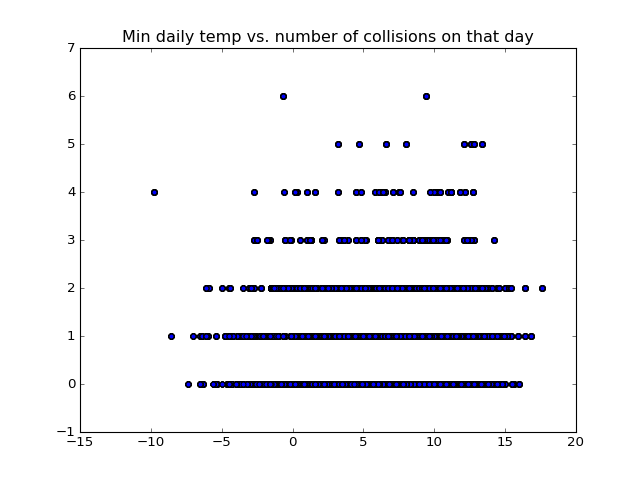

In [5]:
x, y = vpd.xyplot('Traffic', 'COLLISION-DAMAGE UNDER $1000', 1 )
import matplotlib.pyplot as plt
%pylab nbagg
plt.title("Min daily temp vs. number of collisions on that day")
plt.scatter(x,y)

## What we really want to do

**Question** Is look at on day $x$ if it rains, freezes that *night*, is there a disproporionate number of accidents on day $x+1$? 

**Strategy** 

 * Iterate through every day in the weather data. 
 * Look for days with rain, and min temperature < 0. 
 * Check to see if we have the crime data for the **next** day.
 * Count car accidents above and below \$1000. 
 
 * Compare these numbers to normal days. 
 
**Once you have complete this**

 * Do accidents after freezing rain happen on hills?  Intersections? Make a heat map of all the accident locations. 

In [6]:
import datetime as dt
vpd.wdatlist[ dt.date(2016, 1, 16) ]
## weather data Jan 16th, 2016. 
## Max 10.2 c
## Min 4.6 c
## Mean 7.4 c
## 11.8mm rain! 
## 0.0 cm snow.

(10.2, 4.6, 7.4, 11.8, 0.0)

In [7]:
## vpd.wdatlist is dictorary:
## indexed by date
## vpd.wdatlist[date data] = (max c, min c, mean c, rain cm, snow cm)

f_rain_events = []

## iterating the wdatlist dictionary
for dat, wdat in vpd.wdatlist.items():
    ## dat is the date, wdat is wdatlist[dat], i.e. the weather tuple
    if (wdat[1]<0.0) and (wdat[3]>0.0):
        #print("date = ",dat, "weather = ", wdat)
        f_rain_events.append(dat)

print(len(f_rain_events), " freezing rain events.")
sfre = sorted(f_rain_events)
#for x in sfre:
#    print(x)
    

80  freezing rain events.


In [14]:
## Let's look for crime records on f_rain_events day + 1. 
##  for this we need the timedelta object (a difference of dates)
one_day = dt.timedelta(1) ## see time delta docs

hdata = []

tinc_after = []
for x in f_rain_events:
    next_day = x + one_day
    ## let's look for next_day in the crime data. 
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            tinc_after.append(c)
            hdata.append( [c.latitude, c.longitude, 0.02] )
print(len(tinc_after), "  ? maybe relevant ? traffic events after freezing rain, on all days.")
print(len(f_rain_events), " total days w/ freezing rain. ")
print("Average of ", len(tinc_after)/len(f_rain_events), " per freezing rain day. " )

## let's compare to "normal days".  Normal will mean, not a freezing rain day. 
## all dates. . .
allothdats = [k+one_day for k in vpd.wdatlist.keys() if (k not in f_rain_events)]
oth_coll = []
oth_hdata = []
print(len(allothdats), " total other days")
for x in allothdats:
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            oth_coll.append(c)
            oth_hdata.append( [c.latitude, c.longitude, 0.02] )
print("Average of ", len(oth_coll)/len(allothdats), " per non-freezing rain day. " )

167   ? maybe relevant ? traffic events after freezing rain, on all days.
80  total days w/ freezing rain. 
Average of  2.0875  per freezing rain day. 
1922  total other days
Average of  5.0  per non-freezing rain day. 


In [9]:
## let's build a heat map of collisions after freezing rain. 
expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)

## sudo pip install folium

import folium as fo
from folium import plugins as fpl

mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
mapa.add_children(fpl.HeatMap(hdata))
#mapa.create_map(path='assault.wdw.heatmap.html')
mapa


## Lab 2

TBA
